##  1. Perkenalan


===============================================================================================================================================

Nama                    : Raodah Hasman

Batch                   : 030 RMT


Latar belakang : Air merupakan aset yang berharga dan ketersediaannya mempengaruhi banyak aspek kehidupan sehari-hari, termasuk pertanian, industri, dan kebutuhan rumah tangga. Namun, Kualitas air yang buruk dapat memberikan dampak yang buruk, terutama dapat mengancam kesehatan masyarakat dengan menyebabkan berbagai macam penyakit. Dengan dibuatnya project untuk memprediksi apakah air aman atau tidak, pencegahan dapat dilakukan untuk melindungi kesehatan masyarakat.  

Gambaran besar dataset  : Dataset yang digunakan berisi fitur-fitur yang memberikan informasi tentang berbagai parameter kimia dan biologi dalam air bersih untuk menilai kualitas dan keamanan air.

Objective               : Project ini dibuat untuk meningkatkan kemampuan model dalam memprediksi air apakah tergolong aman atau tidak sehingga air dapat digunakan/dimanfaatkan sesuai dengan kebutuhan masyarakat.

===============================================================================================================================================



##  2. Import Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle


##  3. Data Loading

In [3]:
df = pd.read_csv('waterQuality1.csv')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
#Menampilkan 5 data teratas
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
#Menampilkan 5 data terbawah
df.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7994,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7998,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [6]:
#Menampilkan rangkuman informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Insight:
-   Dataset terdiri dari 7999 baris dan 21 kolom.
-   Terdapat 19 fitur yang valuesnya bertipe float dan 2 lainnya bertipe object.
-   Pada fitur 'ammonia' tipe datanya adalah object sedangkan informasi atau values pada fitur berupa numerik yang bersifat kontinu (terlihat pada df.head() dan df.tail()) sehingga akan dilakukan ubah tipe data.
-   Tidak terdapat missing values.

In [7]:
#Menduplikat dataset 
data_duplicate = df.copy()

In [8]:
#Mengecek statistik sederhana dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aluminium,7999.0,0.666158,1.265145,0.0,0.040,0.070,0.280,5.05
arsenic,7999.0,0.161445,0.252590,0.0,0.030,0.050,0.100,1.05
barium,7999.0,1.567715,1.216091,0.0,0.560,1.190,2.480,4.94
cadmium,7999.0,0.042806,0.036049,0.0,0.008,0.040,0.070,0.13
chloramine,7999.0,2.176831,2.567027,0.0,0.100,0.530,4.240,8.68
chromium,7999.0,0.247226,0.270640,0.0,0.050,0.090,0.440,0.90
copper,7999.0,0.805857,0.653539,0.0,0.090,0.750,1.390,2.00
flouride,7999.0,0.771565,0.435373,0.0,0.405,0.770,1.160,1.50
bacteria,7999.0,0.319665,0.329485,0.0,0.000,0.220,0.610,1.00
viruses,7999.0,0.328583,0.378096,0.0,0.002,0.008,0.700,1.00


Insight:
-   Berdasarkan hasil perhitungan statistik sederhana, hampir semua fitur memiliki nilai rata-rata yang jauh dari nilai maksimum, yang artinya kemungkinan data tidak terdistribusi normal sehingga akan dilakukan pengecekan lebih lanjut.

##  4. Exploratory Data Analysis (EDA)

#####   Cek Missing Values

In [9]:
# Cek null values
null_values = df.isnull().sum()
print(null_values)

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


Tidak terdapat missing values pada dataset yang digunakan.

In [10]:
#Cek duplikat data
duplicates_df = df[df.duplicated()]
duplicates_df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


-   Tidak terdapat data duplikat

In [11]:
#Memeriksa values fitur is_safe
df['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

Insingh : 
-   Values is_safe sudah berupa angka, yang artinya data kategorik ini telah diencoding sebelumnya, angka 0 menunjukkan kategori tidak aman dan angka 1 menunjukkan kategori aman.
-   Terdapat 3 data yang keterangannya 'NUM' yang nantinya akan dihapus.

#####   Cek distribusi di beberapa fitur Numerik

In [12]:
#Melihat daftar fitur-fitur numerik pada dataset
num_fitur = df.select_dtypes(include=['float64']).columns.tolist()
num_fitur

['aluminium',
 'arsenic',
 'barium',
 'cadmium',
 'chloramine',
 'chromium',
 'copper',
 'flouride',
 'bacteria',
 'viruses',
 'lead',
 'nitrates',
 'nitrites',
 'mercury',
 'perchlorate',
 'radium',
 'selenium',
 'silver',
 'uranium']

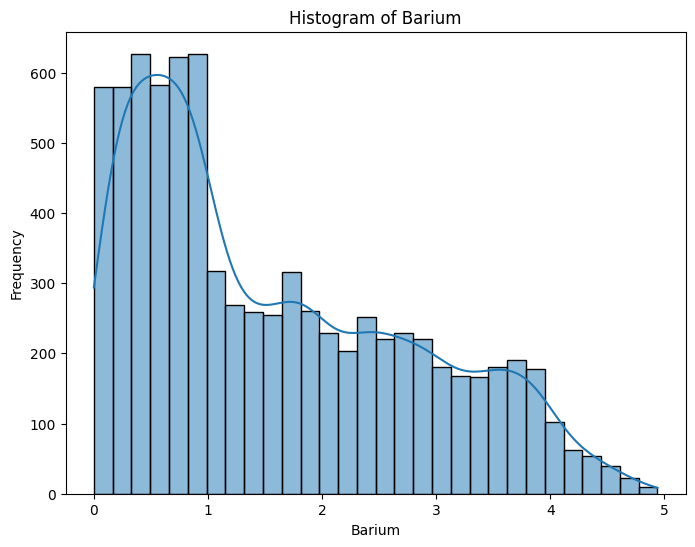

In [13]:
# cek distribusi fitur "Barium"
plt.figure(figsize=(8, 6))
sns.histplot(df['barium'], kde=True, bins=30)
plt.title(f'Histogram of Barium')
plt.xlabel('Barium')
plt.ylabel('Frequency')
plt.show()

Insight: 
-   Berdasarkan visualisasi di atas, dapat kita lihat bahwa rata-ratanya berada pada 1.5, namun dilihat dari garis kemiringannya, data condong ke kanan atau skeww positif yang artinya sebagian besar air memiliki konsentrasi barium yang cukup tinggi atau di atas nilai rata-rata, sehingga data terdistribusi tidak normal. 

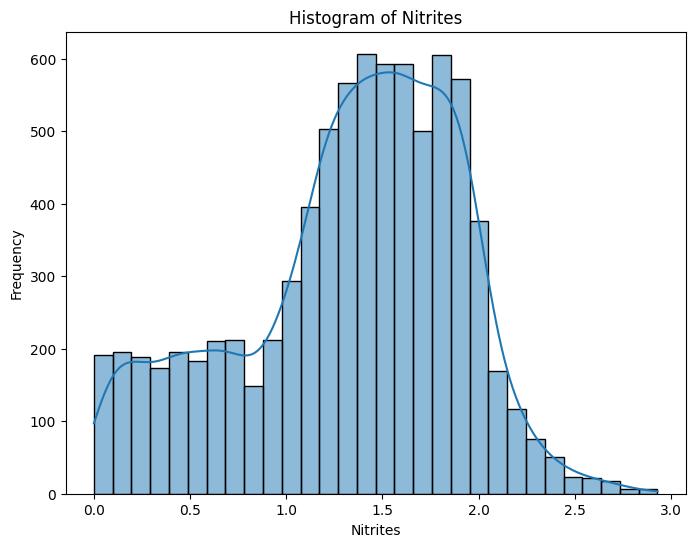

In [14]:
# cek distribusi fitur "Nitrites"
plt.figure(figsize=(8, 6))
sns.histplot(df['nitrites'], kde=True, bins=30)
plt.title(f'Histogram of Nitrites')
plt.xlabel('Nitrites')
plt.ylabel('Frequency')
plt.show()

Insight: 
-   Berdasarkan visualisasi di atas, dapat kita lihat bahwa rata-ratanya berada 1.4, 1.5 atau 1.6. Dan jika dilihat dari garis kemiringannya, data condong ke kiri atau negatif skeww yang artinya sebagian besar sample air memiliki konsentrasi nitrites yang lebih rendah dari nilai rata-rata, sehingga data terdistribusi tidak normal.

#####   Cek outlier dengan menggunakan boxplot

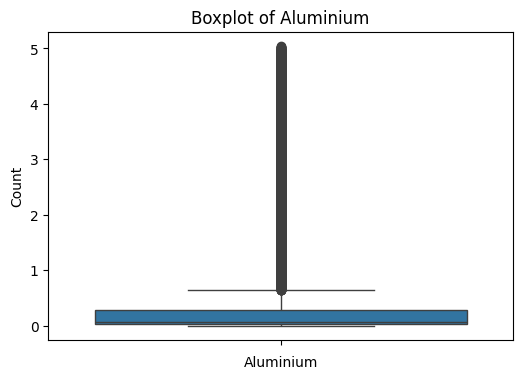

In [15]:
#Membuat boxplot untuk fitur Aluminium
plt.figure(figsize=(6, 4))
sns.boxplot(df['aluminium'])
plt.title('Boxplot of Aluminium')
plt.xlabel('Aluminium')
plt.ylabel('Count')
plt.show()

-   Berdasarkan boxplot yang ditampilkan, terdapat outlier pada fitur aluminium, dimana nilai-nilai banyak berada di atas quartil (Q3) yang menunjukkan nilai tersebut jauh dari nilai normal yang artinya, adanya konsentrasi aluminium yang sangat tinggi pada beberapa sampel air.

#####   Cek korelasi antar beberapa fitur

In [16]:
#Cek korelasi antara fitur aluminium dan arsenic
korelasi_2fitur = df[['aluminium', 'arsenic']].corr().iloc[0, 1]
print(f'korelasi antara fitur aluminium dan arsenic : {korelasi_2fitur}')

korelasi antara fitur aluminium dan arsenic : 0.2257729248124068


Insight : Berdasarkan nilai korelasi yang ada antara fitur aluminium dan arsenic yaitu sebesar 0.225 (mendekati nol) ini menunjukkan bahwa tidak adanya korelasi yang kuat di antara kedua fitur tersebut. 

In [17]:
#Cek korelasi antara fitur bacteria dan viruses
korelasi_2fitur = df[['bacteria', 'viruses']].corr().iloc[0, 1]
print(f'korelasi antara fitur bacteria dan viruses : {korelasi_2fitur}')

korelasi antara fitur bacteria dan viruses : 0.6184803711321573


Insight : Berdasarkan nilai korelasi yang ada antara fitur bacteria dan viruses yaitu sebesar 0.618 (mendekati 1) menunjukkan bahwa adanya korelasi yang cukup kuat di antara kedua fitur tersebut.

#####   Perhitungan statistik sederhana

In [18]:
#Menghitung rata-rata konsentrasi bakteri berdasarkan kategori is_safe
mean_bakteri_per_kategori = df.groupby('is_safe')['bacteria'].mean()

print(f'rata-rata konsentrasi bakteri berdasarkan kategori is_safe : {mean_bakteri_per_kategori}')

rata-rata konsentrasi bakteri berdasarkan kategori is_safe : is_safe
#NUM!    0.190000
0        0.322324
1        0.299441
Name: bacteria, dtype: float64


Insight :
-   Rata-rata konsentrasi bakteri untuk sampel air yang dikategorikan sebagai class 0 (tidak aman) adalah sebesar 0.322324.
-   Rata-rata konsentrasi bakteri untuk sampel air yang dikategorikan sebagai class 1 (aman) adalah sebesar 0.299441.

##  5. Feature Engineering

#####   Ubah Tipe Data

-   Pada saat melakukan ekplorasi data analysisi (EDA) terdapat fitur yang valuenya tidak sesuai dengan tipe datanya yaitu pada fitur "Ammonia" dan "is_safe" sehingga tipe datanya akan diubah

In [21]:
#Mengubah tipe data fitur 'Ammonia'
df['ammonia'] = df['ammonia'].astype(float)

print(df.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object


C:\Users\raoda\AppData\Local\Temp\ipykernel_18560\1522978323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ammonia'] = df['ammonia'].astype(float)


In [22]:
#Mengubah tipe data is_safe
df['is_safe'] = df['is_safe'].astype(int)

C:\Users\raoda\AppData\Local\Temp\ipykernel_18560\764494839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_safe'] = df['is_safe'].astype(int)


#####   Cek Cardinality

In [23]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique


Tidak terdapat cardinality

In [20]:
#Menghapus 'NUM' Values pada fitur "is_safe"
df = df[df['is_safe'] != '#NUM!']
df['is_safe'].value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

##### Split between X (Features) and y (target)

In [24]:
X = df.drop(['is_safe'], axis = 1)
y = df['is_safe']

In [25]:
#Cek value X
X

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,0.000,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,0.000,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,0.000,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00


In [26]:
#Cek target 
y.value_counts()

is_safe
0    7084
1     912
Name: count, dtype: int64

-   Data imbalance, dimana terdapat class minoritas, yaitu pada class 1 yang hanya sebanyak 912 data sedangkan class 0 sebanyak 7084 data.

##### Splitting between Train-Set and Test-set

In [27]:
#Splitting between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (6396, 20)
Test Size:  (1600, 20)


Dataset sudah dibagi menjadi data train dan test:
-   Data train sebanyak 6396 baris dan 20 fitur/kolom.
-   Data test sebanyak 1600 baris dan 20 fitur.


#####   Feature Selection using Feature Importance

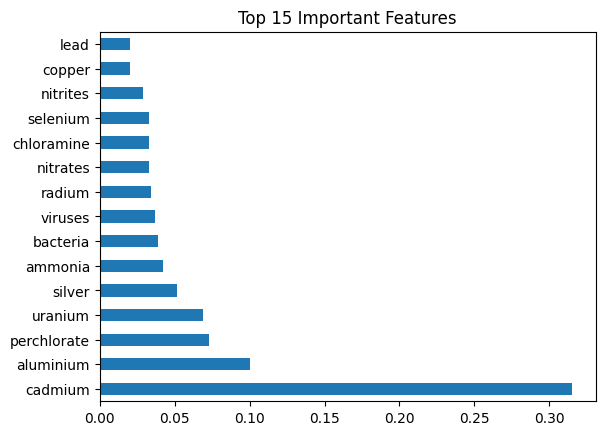

In [28]:
#membuat dan melatih model XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

#menghitung dan menampilkan fitur penting
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh').invert_yaxis()

#plot 15 fitur penting
plt.title('Top 15 Important Features')
plt.gca().invert_yaxis()
plt.show()

15 fitur ini akan saya gunakan pada pemodelan. Namun 5 fitur lainnya tetap akan saya gunakan karena saya menganggap fitur-fitur yang ada, semuanya sangat penting karena  berisi informasi zat-zat kimia yang terkandung pada air sehingga sangat berpengaruh dalam menentukan apakah air aman atau tidak.

#####   Handling Outliers

In [29]:
#Cek outliers dengan menghitung nilai skewnessnya
num_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)

,nama kolom,nilai skewness
0,aluminium,2.002420
1,ammonia,0.029404
2,arsenic,1.965312
3,barium,0.668539
4,cadmium,0.471530
5,chloramine,0.884156
6,chromium,1.016803
7,copper,0.256956
8,flouride,-0.035066
9,bacteria,0.562419


In [30]:
#Cek persentase outlier pada data train
num_train = X_train._get_numeric_data()
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column aluminium outliers = 21.76%
Column ammonia outliers = 0.00%
Column arsenic outliers = 20.72%
Column barium outliers = 0.00%
Column cadmium outliers = 0.00%
Column chloramine outliers = 0.00%
Column chromium outliers = 0.00%
Column copper outliers = 0.00%
Column flouride outliers = 0.00%
Column bacteria outliers = 0.00%
Column viruses outliers = 0.00%
Column lead outliers = 0.00%
Column nitrates outliers = 0.00%
Column nitrites outliers = 0.02%
Column mercury outliers = 0.00%
Column perchlorate outliers = 0.00%
Column radium outliers = 0.00%
Column selenium outliers = 0.00%
Column silver outliers = 0.00%
Column uranium outliers = 0.00%


In [31]:
#Cek persentase outlier pada data testing
num_test = X_test._get_numeric_data()
for k, v in num_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column aluminium outliers = 21.00%
Column ammonia outliers = 0.00%
Column arsenic outliers = 18.75%
Column barium outliers = 0.00%
Column cadmium outliers = 0.00%
Column chloramine outliers = 0.00%
Column chromium outliers = 0.00%
Column copper outliers = 0.00%
Column flouride outliers = 0.00%
Column bacteria outliers = 0.00%
Column viruses outliers = 0.00%
Column lead outliers = 0.00%
Column nitrates outliers = 0.00%
Column nitrites outliers = 0.06%
Column mercury outliers = 0.00%
Column perchlorate outliers = 0.00%
Column radium outliers = 0.00%
Column selenium outliers = 0.00%
Column silver outliers = 0.00%
Column uranium outliers = 0.00%


Insight : 
1. Berdasarkan persentase ouliers : 
-   Pada data train, terdapat dua fitur yang memiliki persentase ouliers sangat tinggi yaitu pada fitur "aluminium" sebesar 21.76% dan pada fitur "arsenic" sebesar 20.72%.
-   Pada data testing, kedua fitur tersebut juga memiliki persentase outliers yang sangat tinggi yaitu sebesar 21.00% dan 18.75%.
2. Berdasarkan nilai skewnessnya (Data Normal memiliki nilai skewness dengan range -0.5 sampai 0.5.) :
-  Terdapat 11 fitur yang terdistribusi normal yaitu : [ammonia, cadmium, copper, flouride, viruses, lead, nitrates, nitrites, mercury, selenium dan uranium].
-   Terdapat 9 fitur yang terdistribusi tidak normal yaitu : [aluminium, arsenic, barium, chloramine, chromium, bacteria, perchlorate, radium dan silver].


Action  : Handling Outlier akan dilakukan dengan menggunakan winsorizer.

In [32]:
# Capping terhadap data yang terdistribusi normal
winsoriser1 = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['ammonia', 'cadmium', 'copper', 'mercury',
                                       'viruses', 'lead', 'nitrates', 'flouride',
                                       'nitrites', 'selenium', 'uranium'],
                            missing_values='ignore')

X_train_capped = winsoriser1.fit_transform(X_train)
X_test_capped = winsoriser1.transform(X_test)

In [33]:
#capping terhadap data yang tidak terdistribusi normal
winsorizer2 = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3, 
                            variables=['aluminium', 'chloramine', 'arsenic', 'barium', 'chromium',
                                        'bacteria', 'perchlorate', 'radium', 'silver'],
                            missing_values='ignore')

X_train_cap = winsorizer2.fit_transform(X_train_capped)
X_test_cap = winsorizer2.transform(X_test_capped)

#####   Handling Missing Values

In [34]:
X_train_cap.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
dtype: int64

In [35]:
X_test_cap.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
dtype: int64

In [36]:
y_train.isnull().sum()

0

In [37]:
y_test.isnull().sum()

0

-   Tidak terdapat missing values pada dataset, sehingga proses feature engineering dapat dilanjutkan ke tahapan berikutnya.

#####   Column Transformer

In [38]:
#Making column transformer for preprocessing
transformer = ColumnTransformer([
('scaler', StandardScaler(), selector(dtype_exclude='object'))
])

##  6. Model Definition

In [39]:
#Making pipeline for KNN
pipe_knn = Pipeline([
('transformer', transformer),
('classifier', KNeighborsClassifier())
])

#Making pipeline for SVM
pipe_svm = Pipeline([
('transformer', transformer),
('classifier', SVC())
])

#Making pipeline for Decision Tree
pipe_dt = Pipeline([
('transformer', transformer),
('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest
pipe_rf = Pipeline([
('transformer', transformer),
('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost
pipe_xgb = Pipeline([
('transformer', transformer),
('classifier', XGBClassifier()) 
])

##  7. Model Training

In [40]:
#Train the model KNN

pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89CF7E20>)])),
                ('classifier', KNeighborsClassifier())])

In [41]:
#Train the model SVM
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89CF7E20>)])),
                ('classifier', SVC())])

In [42]:
#Train the model Decision Tree
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89CF7E20>)])),
                ('classifier', DecisionTreeClassifier())])

In [43]:
#Train the model Random Forest
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89CF7E20>)])),
                ('classifier', RandomForestClassifier())])

In [44]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89CF7E20>)])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

##  8. Model Evaluation

####    KNN

In [45]:
# Mengonversi tipe data y_train dan y_test ke integer
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Melatih model
pipe_knn.fit(X_train, y_train_int)
print('Training Score: ', round(pipe_knn.score(X_train, y_train_int), 4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test_int), 4))


Training Score:  0.9362
Testing Score:  0.9131


Tidak terjadi overfitting maupun underfitting karena perbedaan train dan test score tidak terlalu besar.

In [46]:
y_knn_pred = pipe_knn.predict(X_test)
y_knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
target = ['0', '1']
print(classification_report(y_test_int, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1420
           1       0.74      0.36      0.48       180

    accuracy                           0.91      1600
   macro avg       0.83      0.67      0.72      1600
weighted avg       0.90      0.91      0.90      1600



In [49]:
#Cross Validation dengan menggunakan metrik recall
recall_train_cross_val = cross_val_score(pipe_knn,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean() - recall_train_cross_val.std()), '-', (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.40163934 0.34836066 0.41393443]
Recall Score - Mean - Cross Validation :  0.3879781420765027
Recall Score - Std - Cross Validation  :  0.0284599271256826
Recall Score - Range of Test-Set       :  0.35951821495082015 - 0.4164380692021853


Insight : 
Berdasarkan metrik Evaluasi dari model klasifikasi KNN, hasil prediksinya dapat disimpulkan:
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.92, yang artinya dari semua prediksi 0 yang dibuat, sekitar 92% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.74, yang artinya dari semua prediksi 1 yang dibuat, sekitar 74% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.98, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 98% dengan benar.
-   Recall untuk kelas 1 adalah 0.36, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 36% dengan benar.
3. Berdasarkan akurasi
-   Berdasarkan nilai akurasi sebesar 0.91, artinya 91% model memprediksi air aman atau tidak aman dengan benar.

Kesimpulan : model knn memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang dalam mengidentifikasi kelas 1.

####    SVM

In [50]:
pipe_svm.fit(X_train, y_train_int)
print('Training Score: ', round(pipe_svm.score(X_train, y_train_int), 4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test_int), 4))

Training Score:  0.9547
Testing Score:  0.9356


Tidak terindikasi overfitting maupun underfitting karena perbedaan nilai antara training dan test relatif kecil.

In [51]:
y_svm_pred = pipe_svm.predict(X_test)
y_svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
target = ['0', '1']
print(classification_report(y_test_int, y_svm_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1420
           1       0.87      0.50      0.64       180

    accuracy                           0.94      1600
   macro avg       0.91      0.75      0.80      1600
weighted avg       0.93      0.94      0.93      1600



In [53]:
#Cross Validation dengan menggunakan metrik recall
recall_train_cross_val = cross_val_score(pipe_svm,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean() - recall_train_cross_val.std()), '-', (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.54918033 0.51229508 0.56557377]
Recall Score - Mean - Cross Validation :  0.5423497267759564
Recall Score - Std - Cross Validation  :  0.02228074648948101
Recall Score - Range of Test-Set       :  0.5200689802864754 - 0.5646304732654374


Insight : 
Berdasarkan metrik Evaluasi dari model klasifikasi SVM, hasil prediksinya dapat disimpulkan:
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.94, yang artinya dari semua prediksi 0 yang dibuat, sekitar 94% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.87, yang artinya dari semua prediksi 1 yang dibuat, sekitar 87% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.99, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 99% dengan benar.
-   Recall untuk kelas 1 adalah 0.50, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 50% dengan benar.
3. Berdasarkan akurasi
-   Berdasarkan nilai akurasi sebesar 0.94, artinya 94% model memprediksi air aman atau tidak aman dengan benar.

Kesimpulan : model svm memiliki performa yang baik dalam mengidentifikasi kelas 0 namun performanya kurang dalam mengidentifikasi kelas 1.

####    Decision Tree

In [54]:
pipe_dt.fit(X_train, y_train_int)
print('Training Score: ', round(pipe_dt.score(X_train, y_train_int), 4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test_int), 4))

Training Score:  1.0
Testing Score:  0.9537


Berdasarkan nilai training score dan testing score, kemungkinan adanya overfitting namun tidak terlalu parah karena nilai testing score masih cukup tinggi yaitu 0.95

In [55]:
y_dt_pred = pipe_dt.predict(X_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
target = ['0', '1']
print(classification_report(y_test_int, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1420
           1       0.79      0.80      0.80       180

    accuracy                           0.95      1600
   macro avg       0.88      0.89      0.88      1600
weighted avg       0.95      0.95      0.95      1600



In [57]:
#Cross Validation dengan menggunakan metrik recall
recall_train_cross_val = cross_val_score(pipe_dt,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean() - recall_train_cross_val.std()), '-', (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.81147541 0.78278689 0.77868852]
Recall Score - Mean - Cross Validation :  0.7909836065573771
Recall Score - Std - Cross Validation  :  0.014586172475452616
Recall Score - Range of Test-Set       :  0.7763974340819245 - 0.8055697790328297


Insight : 
Berdasarkan metrik Evaluasi dari model klasifikasi Decision Tree, hasil prediksinya dapat disimpulkan:
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.97, yang artinya dari semua prediksi 0 yang dibuat, sekitar 97% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.79, yang artinya dari semua prediksi 1 yang dibuat, sekitar 79% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.97, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 97% dengan benar.
-   Recall untuk kelas 1 adalah 0.79, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 79% dengan benar.
3. Berdasarkan akurasi
-   Berdasarkan nilai akurasi sebesar 0.95, artinya 95% model memprediksi air aman atau tidak aman dengan benar.

Kesimpulan : model decision tree memiliki performa yang baik dalam mengidentifikasi kedua kelas, baik kelas 0 maupun kelas 1.

####    Random Forest

In [58]:
pipe_rf.fit(X_train, y_train_int)
print('Training Score: ', round(pipe_rf.score(X_train, y_train_int), 4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test_int), 4))

Training Score:  1.0
Testing Score:  0.9519


Berdasarkan nilai training score dan testing score, kemungkinan adanya overfitting namun tidak terlalu parah karena nilai testing score masih cukup tinggi yaitu 0.95

In [59]:
y_rf_pred = pipe_rf.predict(X_test)
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
target = ['0', '1']
print(classification_report(y_test_int, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1420
           1       0.89      0.66      0.75       180

    accuracy                           0.95      1600
   macro avg       0.92      0.82      0.86      1600
weighted avg       0.95      0.95      0.95      1600



In [61]:
#Cross Validation dengan menggunakan metrik recall
recall_train_cross_val = cross_val_score(pipe_rf,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean() - recall_train_cross_val.std()), '-', (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.62704918 0.6147541  0.68442623]
Recall Score - Mean - Cross Validation :  0.6420765027322405
Recall Score - Std - Cross Validation  :  0.030363539304498473
Recall Score - Range of Test-Set       :  0.6117129634277421 - 0.6724400420367389


Insight : 
Berdasarkan metrik Evaluasi dari model klasifikasi Random Forest, hasil prediksinya dapat disimpulkan:
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.96, yang artinya dari semua prediksi 0 yang dibuat, sekitar 96% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.89, yang artinya dari semua prediksi 1 yang dibuat, sekitar 89% diprediksi secara benar.
2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.99, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 99% dengan benar.
-   Recall untuk kelas 1 adalah 0.65, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 65% dengan benar.
3. Berdasarkan akurasi
-   Berdasarkan nilai akurasi sebesar 0.95, artinya 95% model memprediksi air aman atau tidak aman dengan benar.

Kesimpulan : model random forest memiliki performa yang baik dalam mengidentifikasi kelas 0, namun memiliki performa yang kurang baik dalam mengidentifikasi kelas 1.

####    XGBoost Classifier

In [62]:
pipe_xgb.fit(X_train, y_train_int)
print('Training Score: ', round(pipe_xgb.score(X_train, y_train_int), 4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test_int), 4))

Training Score:  1.0
Testing Score:  0.9644


Berdasarkan nilai training score dan testing score, kemungkinan adanya overfitting namun tidak terlalu parah karena nilai testing score masih cukup tinggi yaitu 0.96

In [63]:
y_xgb_pred = pipe_xgb.predict(X_test)
y_xgb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
target = ['0', '1']
print(classification_report(y_test_int, y_xgb_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1420
           1       0.89      0.78      0.83       180

    accuracy                           0.96      1600
   macro avg       0.93      0.89      0.91      1600
weighted avg       0.96      0.96      0.96      1600



In [65]:
#Cross Validation dengan menggunakan metrik recall
recall_train_cross_val = cross_val_score(pipe_xgb,
                                         X_train,
                                         y_train,
                                         cv=3,
                                         scoring="recall")

print('Recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('Recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean() - recall_train_cross_val.std()), '-', (recall_train_cross_val.mean() + recall_train_cross_val.std()))

Recall Score - All - Cross Validation  :  [0.75       0.76229508 0.76639344]
Recall Score - Mean - Cross Validation :  0.7595628415300547
Recall Score - Std - Cross Validation  :  0.00696587365244916
Recall Score - Range of Test-Set       :  0.7525969678776055 - 0.7665287151825039


Insight : 
Berdasarkan metrik Evaluasi dari model klasifikasi XGBoost, hasil prediksinya dapat disimpulkan:
1. Berdasarkan Precision
-   Untuk kelas 0 senilai 0.97, yang artinya dari semua prediksi 0 yang dibuat, sekitar 97% diprediksi secara benar.
-   Untuk kelas 1 senilai 0.89, yang artinya dari semua prediksi 1 yang dibuat, sekitar 89% diprediksi secara benar.

2. Berdasarkan Recall
-   Recall untuk kelas 0 adalah 0.99, yang artinya dari semua contoh kelas 0 yang sebenarnya, model telah berhasil mengidentifikasi sebesar 99% dengan benar.
-   Recall untuk kelas 1 adalah 0.78, yang artinya dari semua contoh kelas 1 yang sebenarnya, model hanya berhasil mengidentifikasi sebesar 78% dengan benar.

3. Berdasarkan akurasi
-   Berdasarkan nilai akurasi sebesar 0.96, artinya 96% model memprediksi air aman atau tidak aman dengan benar.

Kesimpulan : model random forest memiliki performa yang sangat baik dalam mengidentifikasi kedua kelas, baik kelas 0 maupun kelas 1.

####    Base Model Comparison

In [66]:
models = {
    'K-nearst Neighbors' : pipe_knn,
    'Support Vector Machine' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'Recall' : recall_score,
    'F1 Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Recall'])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [67]:
df_model

,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random Forest,XGBoost
Recall,0.355556,0.5,0.8,0.655556,0.783333
Accuracy,0.913125,0.935625,0.95375,0.951875,0.964375
F1 Score,0.479401,0.636042,0.79558,0.753994,0.831858


Insight : 
1.  performa model 
-   KNN memiliki nilai recall 0.355, accuracy 0.91 dan f1-score sebesar 0.479, menunjukkan model memiliki keterbatasan dalam mengidentifikasi sample air yang sebenarnya tidak aman, namun cukup baik dalam memprediksi keamanan air secara keseluruhan.
-   SVM memiliki nilai recall 0.5, accuracy 0.93 dan f1-score sebesar 0.636, menunjukkan model memiliki keterbatasan dalam mengidentifikasi sample air yang sebenarnya tidak aman, namun cukup baik dalam memprediksi keamanan air secara keseluruhan.
-   Decision Tree memiliki nilai recall yang tinggi yaitu 0.8, accuracy 0.953 dan f1-score sebesar 0.791, menunjukkan model efektif dalam mengidentifikasi air yang sebenarnya tidak aman.
-   Random forest memiliki nilai recall sebesar 0.65, accuracy 0.951 dan F1-score sebesar 0.752. Performa model ini cukup baik, meskipun sedikit di bawah performa model Decision Tree.
-   XGBoost memiliki nilai recall sebesar 0.783, accuracy 0.964 dan F1-score sebesar 0.832. Ini menunjukkan bahwa model XGBoost memberikan performa yang rbaik dalam mengidentifikasi air yang sebenarnya tidak aman.

Berdasarkan hasil di atas, jika dilihat dari segi recall, Decision Tree memiliki performa terbaik jika dibandingkan dengan algoritma lainnya. Namun, jika dilihat dari segi skor accuracy dan  f1-score, XGBoost memiliki performa terbaik jika dibandingkan dengan algoritma yang lain.

Karena pada project ini, akan lebih fokus untuk meminimalisir adanya False Negatif (FN) sehingga akan lebih mengutamakan hasil dari recall, sehingga model Decision Tree akan digunakan dalam project sebagai model yang memiliki performa yang paling baik dengan recall sebesar 80% dan akurasi modelnya sebesar 95%. 

In [68]:
models = {
    'K-nearst Neighbors' : pipe_knn,
    'Support Vector Machine' : pipe_svm,
    'Decision Tree' : pipe_dt,
    'Random Forest' : pipe_rf,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Mean' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='recall').mean(),
    'Std' : cross_val_score(models[model], X_train, y_train, cv = 3, scoring='recall').std()
}

df_cross_val = pd.DataFrame(columns = models.keys(), index = ['Mean', 'Std'])

for i in metrics.keys():
  for j in models.keys():
    df_cross_val.loc[i, j] = metrics[i]

In [69]:
df_cross_val

,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random Forest,XGBoost
Mean,0.759563,0.759563,0.759563,0.759563,0.759563
Std,0.006966,0.006966,0.006966,0.006966,0.006966


Berdasarkan skor recall pemodelan dasar, Decision Tree Merupakan model terbaik. Setelah melakukan beberapa optimalisasi, kita akan melihat apakah Decision tree masih merupakan model terbaik dengan skor tertinggi.

####    Model Optimization

In [70]:
#Parameter Tuning
param_dt = {
    'transformer__scaler' : [StandardScaler(), MinMaxScaler()],
    'classifier__max_depth' : np.arange(4, 8, 2)
}

####   Model Optimization Evaluation 

#####   Decision Tree

In [72]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

In [73]:
print('Train Set Score : ', grid_dt.score(X_train, y_train))
print('Test Set Score : ', grid_dt.score(X_test, y_test))

Train Set Score :  0.9648217636022514
Test Set Score :  0.959375


Performanya sangat baik dan juga tidak mengalami overfitting maupun underfitting karena selisih train dan testing skor sangat kecil.

In [74]:
best_param_dt = grid_dt.best_params_
print(best_param_dt)
print('\n')
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
print('\n')
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__max_depth': 6, 'transformer__scaler': StandardScaler()}


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013F89C27160>)])),
                ('classifier', DecisionTreeClassifier(max_depth=6))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_transformer__scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


Best parameter untuk model Decision tree yaitu nilai max_depthnya 6.

In [75]:
# Function untuk melihat hasil evaluasi dari beberapa metrik
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1420
           1       0.88      0.74      0.80       180

    accuracy                           0.96      1600
   macro avg       0.92      0.87      0.89      1600
weighted avg       0.96      0.96      0.96      1600



####    Model After Tuning Comparison

In [76]:
models = {
    'Decision Tree' : best_pipe_dt
}

metrics = {
    'Accuracy' : accuracy_score,
    'Recall' : recall_score,
    'F1 Score' : f1_score,
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Recall', 'F1 Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [77]:
df_model

,K-nearst Neighbors,Support Vector Machine,Decision Tree,Random Forest,XGBoost
Recall,0.355556,0.5,0.8,0.655556,0.783333
Accuracy,0.913125,0.935625,0.95375,0.951875,0.964375
F1 Score,0.479401,0.636042,0.79558,0.753994,0.831858


In [78]:
model_tuning

,Decision Tree
Recall,0.744444
F1 Score,0.804805
Accuracy,0.959375


Insight : Berdasarkan perbandingan skor antara model dasar dan setelah dioptimalisasi, XGBoost merupakan model yang memiliki nilai terbaik.

##  9. Model Saving

In [80]:
#Save model
pickle.dump(best_pipe_dt, open('model_dt.pkl', 'wb'))


##  10. Model Inference

Model inference dibuat pada notebook yang berbeda

##  11. Kesimpulan

-   Narasi Berdasarkan EDA:
    1. Dalam eksplorasi ini, ditemukan bahwa dataset terdiri dari fitur-fitur yang berisi informasi tentang konsentrasi zat-zat kimia yang terkandung dalam air. Pada proses ini juga dilakukan pengecekan sederhana terkait distribusi beberapa fitur serta korelasinya terhadap fitur lainnya, dan ditemukan beberapa fitur tidak terdistribusi normal. 
    2. Karena dataset yang dimiliki imbalance yang artinya distribusi classnya (target) tidak sama, terdapat kelas minoritas dan mayoritas sehingga kemungkinan modelnya akan bias.

-   Narasi Berdasarkan model evaluasi:
    1. KNN : memiliki nilai recall 0.355, menunjukkan model memiliki keterbatasan dalam mengidentifikasi sample air yang sebenarnya tidak aman.
    2. SVM : memiliki nilai recall 0.5, menunjukkan model memiliki keterbatasan dalam mengidentifikasi sample air yang sebenarnya tidak aman..
    3. Decision Tree : memiliki nilai recall yang tinggi yaitu 0.8, menunjukkan model efektif dalam mengidentifikasi air yang sebenarnya tidak aman.
    4. Random forest : memiliki nilai recall sebesar 0.65. Performa model ini cukup baik, meskipun sedikit di bawah performa model Decision Tree.
    5. XGBoost : memiliki nilai recall sebesar 78.3%, Ini menunjukkan bahwa model XGBoost juga memberikan performa yang baik dalam mengidentifikasi air yang sebenarnya tidak aman.

-   Berdasarkan model evaluasi, pemodelan dengan menggunakan algoritma Decision Tree merupaka best model, dimana kemampuan untuk mengidentifikasi air yang sebenarnya tidak aman sebesar 80% dan akurasi kemampuan model dalam memprediksi air aman atau tidak sebesar 95%.

-   Hasil prediksi menggunakan model Decision Tree memberikan informasi yang berharga dalam pengambilan keputusan terkait kualitas air, sehingga dapat membantu dalam upaya menjaga kesehatan dan keselamatan masyarakat.



##  Conseptual Problem

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
Jawab : 
-   Latar belakang adanya begging adalah untuk mengurangi varians dalam model prediksi. Varians yang tinggi dapat mengakibatkan model terlalu fit terhadap dataset pelatihan tertentu dan tidak mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.
-   Cara kerja: (1). Resampling : dataset pelatihan asli dengan ukuran 𝑛 diambil secara acak sebanyak 𝑛 kali dengan pengembalian. Ini menghasilkan beberapa dataset yang mungkin memiliki beberapa contoh yang sama atau tidak ada sama sekali. (2). Pembangunan model : Setelah dataset pelatihan bootstrap dibuat, model prediksi dibangun secara independen menggunakan setiap dataset bootstrap. Setiap model dibangun dengan algoritma pembelajaran yang sama. (3). Prediksi : Setelah semua model dibangun, prediksi dilakukan menggunakan setiap model pada dataset pengujian atau data baru. Kemudian Hasil prediksi dari semua model digabungkan untuk menghasilkan prediksi akhir. Ada beberapa cara untuk menggabungkan prediksi dari model-model yang berbeda, seperti voting atau rata-rata.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Jawab :
-   Random Forest : (1). Setiap pohon keputusan dibangun dengan menggunakan sub-sampel dari dataset pelatihan yang dihasilkan melalui proses resampling (bootstrap) serta pemilihan fitur secara acak. (2). Proses pembentukan pohon keputusan dalam Random Forest dilakukan secara independen satu sama lain. (3). Setiap pohon keputusan dalam Random Forest dibangun secara independen tanpa penyesuaian terhadap kesalahan model sebelumnya.
-   XGBoost : (1). XGBoost menggunakan pendekatan ensemble learning secara iteratif, di mana setiap model berikutnya (weak learner) dibangun untuk memperbaiki kesalahan prediksi model sebelumnya. (2). Model dalam XGBoost biasanya adalah pohon keputusan, tetapi pada dasarnya dapat menggunakan berbagai jenis model sebagai weak learner. (3). XGBoost melakukan optimasi secara iteratif dengan menggunakan pendekatan gradient boosting. (4). Setiap model berikutnya dalam XGBoost dibangun untuk meminimalkan gradien dari fungsi kerugian (loss function) terhadap prediksi model sebelumnya.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

Jawab : Cross Validation adalah sebuah teknik yang digunakan dalam machine learning untuk mengevaluasi kinerja model prediksi pada data yang tidak pernah terlihat sebelumnya, mencegah overfitting serta memilih model terbaik.